11490434/11490434 [==============================] - 1s 0us/step
10000
Epoch 1/25
118/118 [==============================] - 9s 55ms/step - loss: 0.0803 - val_loss: 0.0449
Epoch 2/25
118/118 [==============================] - 3s 27ms/step - loss: 0.0367 - val_loss: 0.0301
Epoch 3/25
118/118 [==============================] - 3s 27ms/step - loss: 0.0268 - val_loss: 0.0232
Epoch 4/25
118/118 [==============================] - 4s 30ms/step - loss: 0.0213 - val_loss: 0.0188
Epoch 5/25
118/118 [==============================] - 3s 22ms/step - loss: 0.0176 - val_loss: 0.0157
Epoch 6/25
118/118 [==============================] - 2s 14ms/step - loss: 0.0149 - val_loss: 0.0134
Epoch 7/25
118/118 [==============================] - 2s 14ms/step - loss: 0.0128 - val_loss: 0.0116
Epoch 8/25
118/118 [==============================] - 2s 14ms/step - loss: 0.0111 - val_loss: 0.0102
Epoch 9/25
118/118 [==============================] - 2s 14ms/step - loss: 0.0098 - val_loss: 0.0090
Epoch 10/25
118/118 

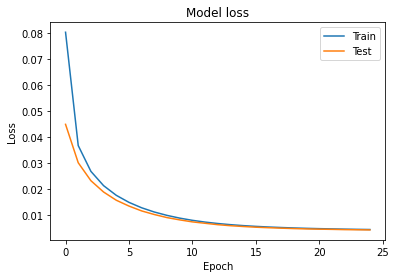

313/313 [==============================] - 1s 3ms/step
[9, 8, 2, 2, 1, 3, 7, 0, 0, 2]
mse and ssim for image 0 are 0.008241552710709336 and 0.9157435067002794
mse and ssim for image 1 are 0.005908701118254086 and 0.9187387832198627
mse and ssim for image 2 are 0.00589340716377869 and 0.9194754779609375
mse and ssim for image 3 are 0.006109773734357031 and 0.9267642368152672
mse and ssim for image 4 are 0.001004745099569768 and 0.9502932723218953
mse and ssim for image 5 are 0.0017732753708333531 and 0.9497514569935578
mse and ssim for image 6 are 0.0018166905348630837 and 0.9084876456841405
mse and ssim for image 7 are 0.003489525122287251 and 0.9516352901958255
mse and ssim for image 8 are 0.003489525122287251 and 0.874462060490264
mse and ssim for image 9 are 0.00410875323893153 and 0.9287475101113473


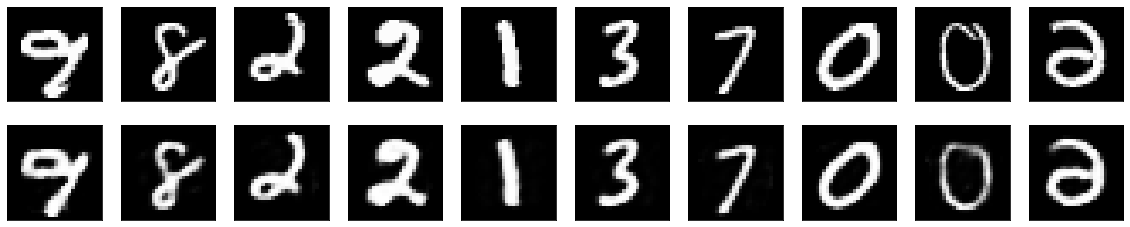

[9, 8, 2, 2, 1, 3, 7, 0, 2]
[9, 8, 2, 2, 1, 3, 7, 0, 0, 2]


In [1]:
# A
import numpy as np
import tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Layer 
from skimage import metrics
## import os can be skipped if there is nocompatibility issue 
## with the OpenMP library and TensorFlow 
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


# Load the MNIST dataset
(x_train, train_labels), (x_test, test_labels) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

 
# Randomize both the training and test
permutation = np.random.permutation(len(x_train))
x_train, train_labels = x_train[permutation], train_labels[permutation]
permutation = np.random.permutation(len(x_test))
x_test, test_labels = x_test[permutation], test_labels[permutation]
# Create the encoder


list_xtest = [ [x_test[i], test_labels[i]] for i in test_labels] 
print(len(list_xtest)) 

encoder_input = Input(shape=(784,))
encoded = Dense(64, activation='relu')(encoder_input)
encoder = Model(encoder_input, encoded)

# Create the decoder
decoder_input = Input(shape=(64,))
decoded = Dense(784, activation='sigmoid')(decoder_input)
decoder = Model(decoder_input, decoded)

# Create the autoencoder
autoencoder = Model(encoder_input, decoder(encoder(encoder_input)))

lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = 5e-01, decay_steps = 2500, decay_rate = 0.75,staircase=True) 
tensorflow.keras.optimizers.Adam(learning_rate = lr_schedule,beta_1=0.95,beta_2=0.99,epsilon=1e-01)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=512,
                shuffle=True,
                validation_data=(x_test, x_test))

# Plot the training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot the test figures vs. predicted figures
decoded_imgs = autoencoder.predict(x_test)


def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0])
    return err

def ssim(imageA, imageB):
    return metrics.structural_similarity(imageA, imageB,channel_axis=None)

decomser = [] 
decossimr = [] 
n = 10
list_xtestn = [ [x_test[i], test_labels[i]] for i in range(10)] 
print([list_xtestn[i][1] for i in range(n)]) 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    if mse(list_xtestn[i][0],decoded_imgs[i]) <= 0.01: 
        msel = mse(list_xtestn[i][0],decoded_imgs[i])
        decomser.append(list_xtestn[i][1])  
    if ssim(list_xtestn[i][0],decoded_imgs[i]) > 0.85:
        ssiml = ssim(list_xtestn[i][0],decoded_imgs[i])
        decossimr.append(list_xtestn[i][1])   
    print("mse and ssim for image %s are %s and %s" %(i,msel,ssiml)) 
plt.show() 

print(decomser)
print(decossimr)


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


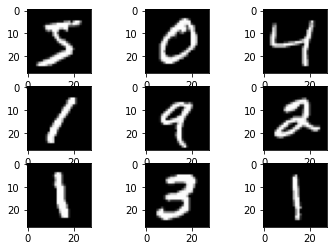

In [6]:
# B
# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()